In [1]:
!pip install wordcloud
!pip install -U sentence-transformers
!pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
import os
import json
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sentence_transformers import SentenceTransformer
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
base_path = '/content/drive/MyDrive/research papers/static'
papers = []

# Recursively traverse folders to find all JSON files
for root, dirs, files in os.walk(base_path):
    # Only process if current folder is named 'papers'
    if os.path.basename(root) != 'papers':
        continue
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                paper = json.load(f)
                # Extract year from format like "2011/09"
                if paper["year"] and "/" in paper["year"]:
                  paper["year"] = int(paper["year"].split('/')[0])
                papers.append(paper)

# Convert to DataFrame
df = pd.DataFrame(papers)
print("Total papers read: ", len(df))
df.head(2)


Total papers read:  4971


,url,title,abstract,citation_count,year,authors,keywords
0,https://link.springer.com/article/10.1007/BF00...,Lessons from the design of a PC-based private ...,"We designed TigerSwitch, a digital private bra...",14,1996.0,"[{'name': 'Wolf, Wayne', 'country': ''}, {'nam...","[Circuits and Systems, Computer-Aided Engineer..."
1,https://link.springer.com/article/10.1007/s106...,Second special issue on SystemC,,0,2005.0,"[{'name': 'Bergamaschi, Reinaldo A.', 'country...","[Circuits and Systems, Computer-Aided Engineer..."


<ipython-input-5-fc109cda928d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


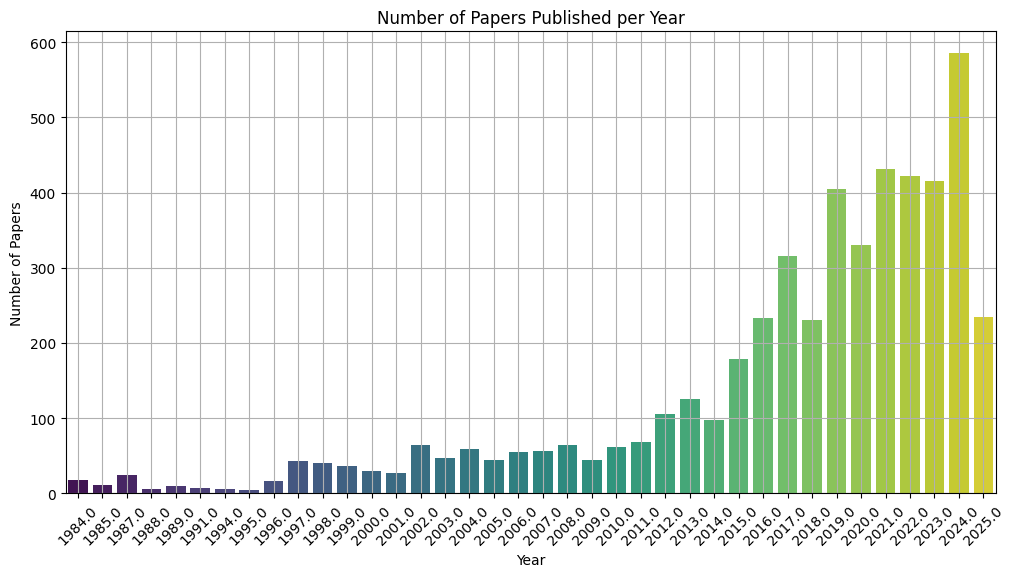

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Papers Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.show()

In [6]:
# converting empty citation count to Nah
df['citation_count'] = pd.to_numeric(df['citation_count'], errors='coerce').apply(np.floor).astype('Int64')

top_cited = df.sort_values(by='citation_count', ascending=False).head(10)
top_cited[['title', 'citation_count']]

,title,citation_count
153,A comprehensive review of firefly algorithms,1129
1570,Robust registration of 2D and 3D point sets,668
1919,Speeded up detection of squared fiducial markers,546
178,Heterogeneous comprehensive learning particle ...,447
1877,A survey of multimodal sentiment analysis,439
366,Push and pull search for solving constrained m...,379
337,A novel Random Walk Grey Wolf Optimizer,355
520,A test-suite of non-convex constrained optimiz...,350
505,A survey on swarm intelligence approaches to f...,328
147,Optimal size and siting of multiple distribute...,276


<ipython-input-7-6e8cb404e568>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kw_df, x='Count', y='Keyword', palette='magma')


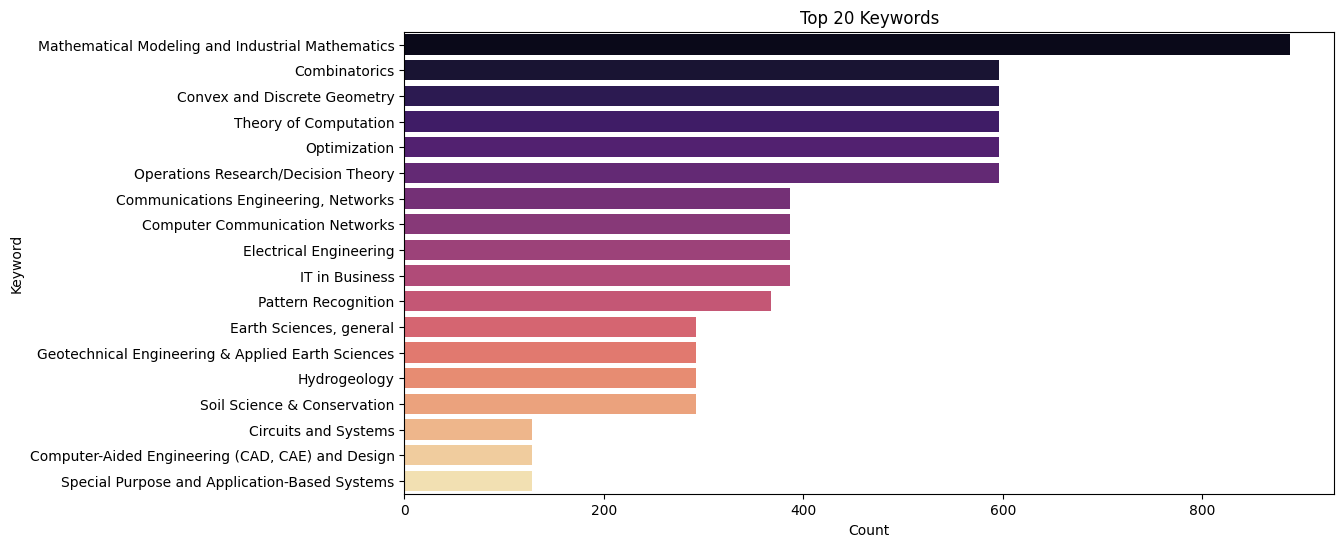

In [7]:
# Flatten list of keywords
all_keywords = [kw for kws in df['keywords'] if isinstance(kws, list) for kw in kws]
keyword_counts = Counter(all_keywords).most_common(20)

# Plot
kw_df = pd.DataFrame(keyword_counts, columns=['Keyword', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=kw_df, x='Count', y='Keyword', palette='magma')
plt.title('Top 20 Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


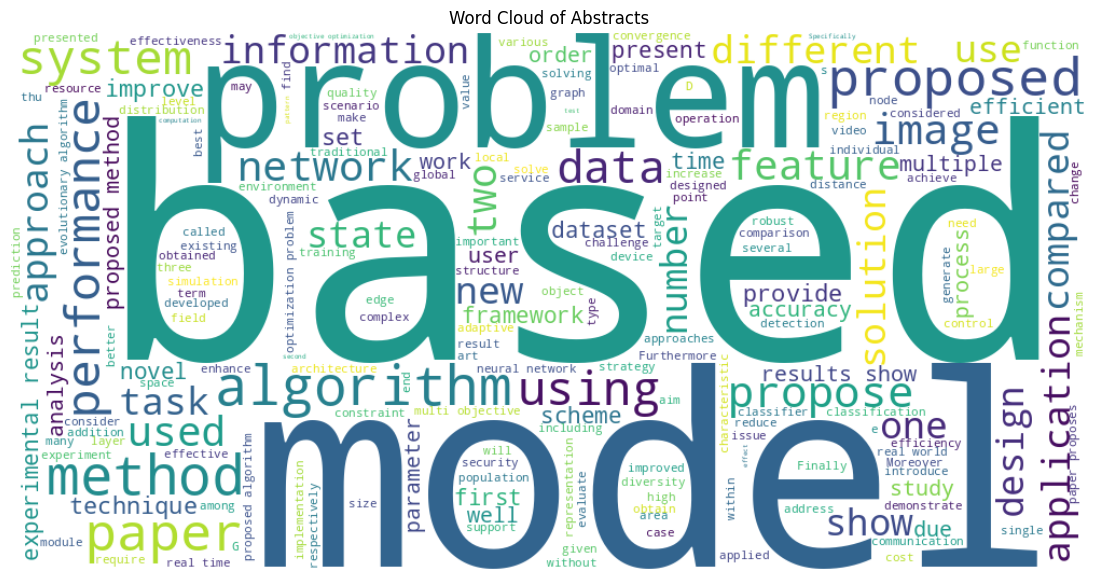

In [8]:
text_blob = ' '.join(df['abstract'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_blob)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Abstracts')
plt.show()

<ipython-input-9-963b78f92e62>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_df, x='Count', y='Country', palette='coolwarm')


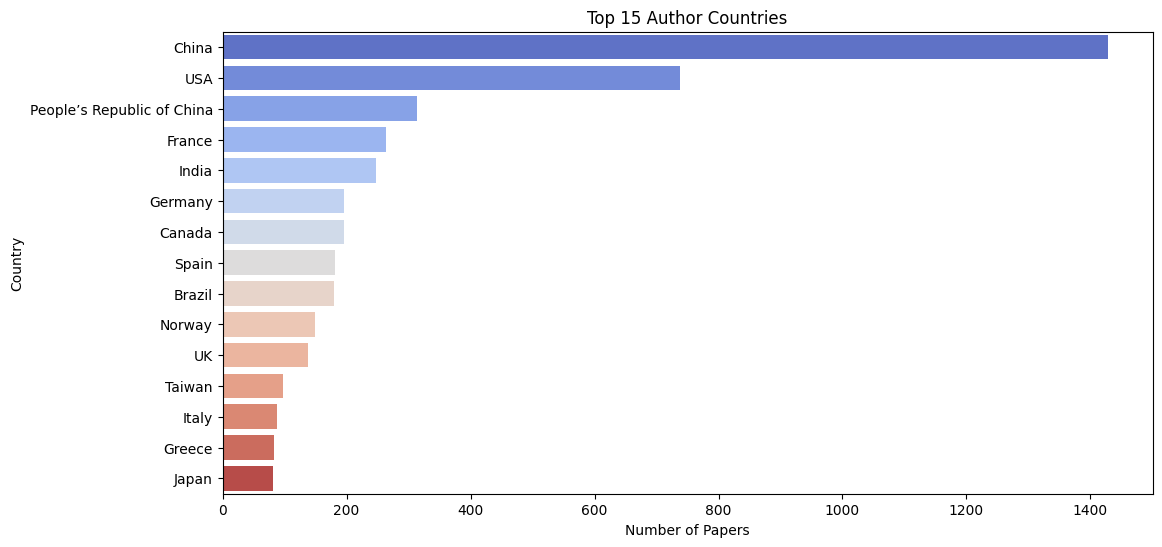

In [9]:
author_countries = []

for authors in df['authors']:
    if isinstance(authors, list):
        for author in authors:
            country = author.get("country")
            if country:
                author_countries.append(country)

country_counts = Counter(author_countries).most_common(15)

country_df = pd.DataFrame(country_counts, columns=['Country', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=country_df, x='Count', y='Country', palette='coolwarm')
plt.title('Top 15 Author Countries')
plt.xlabel('Number of Papers')
plt.ylabel('Country')
plt.show()


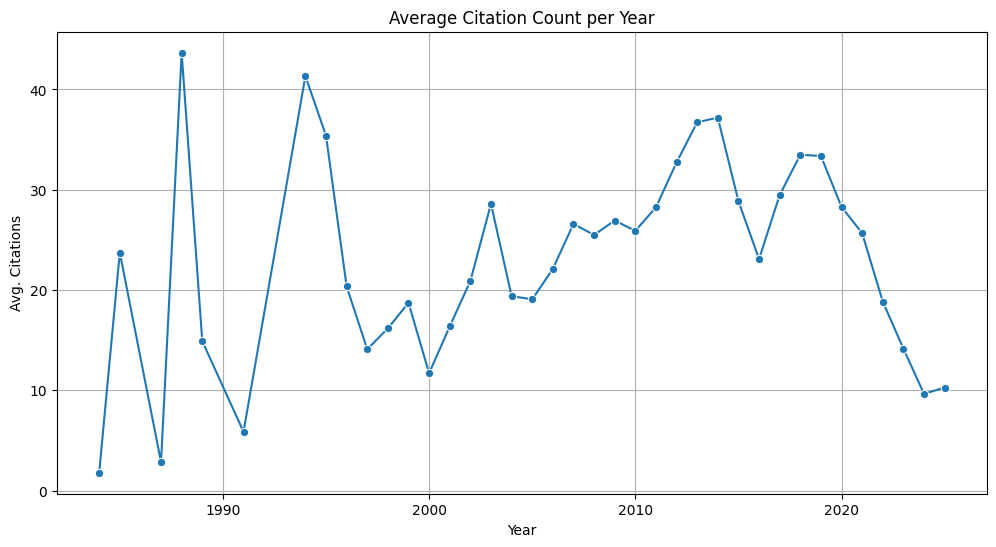

In [10]:
citation_trend = df.groupby('year')['citation_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=citation_trend, x='year', y='citation_count', marker='o')
plt.title('Average Citation Count per Year')
plt.xlabel('Year')
plt.ylabel('Avg. Citations')
plt.grid(True)
plt.show()


In [11]:
top_cited_yearly = df.sort_values(['year', 'citation_count'], ascending=[True, False]).groupby('year').head(1)
top_cited_yearly[['year', 'title', 'citation_count']]

,year,title,citation_count
1543,1984.0,Linear time algorithm for finding a picture's ...,13
1636,1985.0,Relaxation labelling algorithms — a review,133
1736,1987.0,Distributed associative memory for use in scen...,29
1835,1988.0,Image registration by local approximation methods,243
1899,1989.0,Review of shape coding techniques,94
1991,1991.0,Automatic inspection of mechanical parts using...,22
1060,1994.0,Determining the gaze of faces in images,182
1123,1995.0,Image normalization for pattern recognition,142
1235,1996.0,Vision-based robot positioning using neural ne...,66
51,1997.0,Prototyping of Tightly Coupled Hardware/Softwa...,48


# **Identifying Key Research Trends using abstract embeddings (BERT) and clustering**

In [12]:
# Load a lightweight, efficient model
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [13]:
# Handle missing abstracts
df['abstract'] = df['abstract'].fillna('')

# Generate embeddings
abstracts = df['abstract'].tolist()

embeddings = model.encode(abstracts, show_progress_bar=True)

# Store in DataFrame
df['embedding'] = list(embeddings)


Batches:   0%|          | 0/156 [00:00<?, ?it/s]

In [13]:
len(df['embedding'])

4971

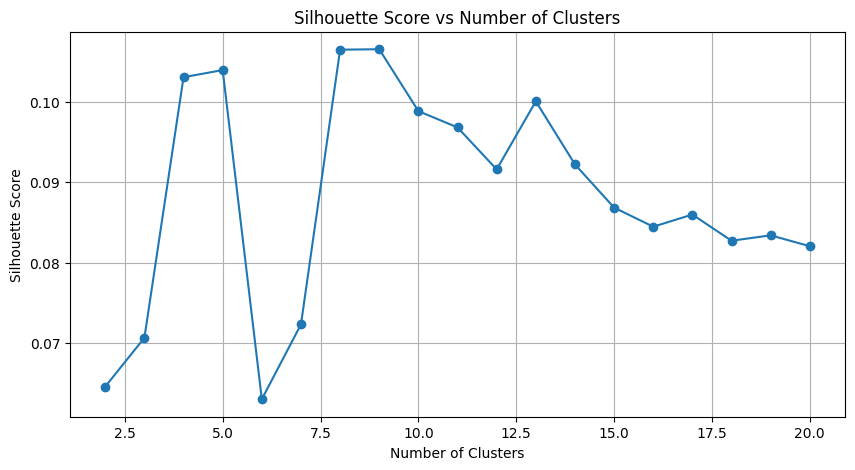

In [14]:
#Finding optimal number of clusters
# Range: -1 to 1
# Close to +1 → well-clustered
# Close to 0 → on the boundary
# Close to -1 → maybe in the wrong cluster

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)  # X = your embedding array
    score = silhouette_score(embeddings, labels)
    scores.append(score)

# Plotting the scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(k_values, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [14]:
from sklearn.cluster import KMeans

# Convert list of embeddings to array
X = np.array(embeddings)

# Decide number of clusters 5 based on silhouette_score
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [17]:
from keybert import KeyBERT
# Loading model using SentenceTransformer so that it utilize GPU
model = SentenceTransformer('all-MiniLM-L6-v2')

kw_model = KeyBERT(model=model)

In [18]:
# Group abstracts into one text block per cluster
cluster_texts = df.groupby('cluster')['abstract'].apply(lambda texts: ' '.join(texts)).to_dict()

# Extract top phrases from each cluster
cluster_keywords_keybert = {}

for i in sorted(cluster_texts.keys()):
    text = cluster_texts[i]
    keywords = kw_model.extract_keywords(
        text,
        keyphrase_ngram_range=(1, 2),  # allow unigrams + bigrams
        stop_words='english',
        top_n=5
    )
    top_phrases = [kw for kw, _ in keywords]
    cluster_keywords_keybert[i] = top_phrases
    print(f"🧠 Cluster {i} likely about: {', '.join(top_phrases)}")


🧠 Cluster 0 likely about: activity recognition, power cnns, cnn human, running cnn, fitness tracking
🧠 Cluster 1 likely about: 
🧠 Cluster 2 likely about: process swarm, multiprocessor task, scheduling processing, scheduling process, scheduling algorithm
🧠 Cluster 3 likely about: processor simulation, processors modeling, hardware execution, processor models, platform scheduling
🧠 Cluster 4 likely about: protocol simulation, network simulators, sensor networks, simulations protocol, sensor network


In [19]:
cluster_labels = {
    0: "Activity Recognition using CNNs",
    1: "Others",  # Still empty, kept placeholder (you can update later)
    2: "Swarm Intelligence & Task Scheduling",
    3: "Processor Modeling & Simulation",
    4: "Network Simulation & Sensor Networks"
}

df['topic_label'] = df['cluster'].map(cluster_labels)


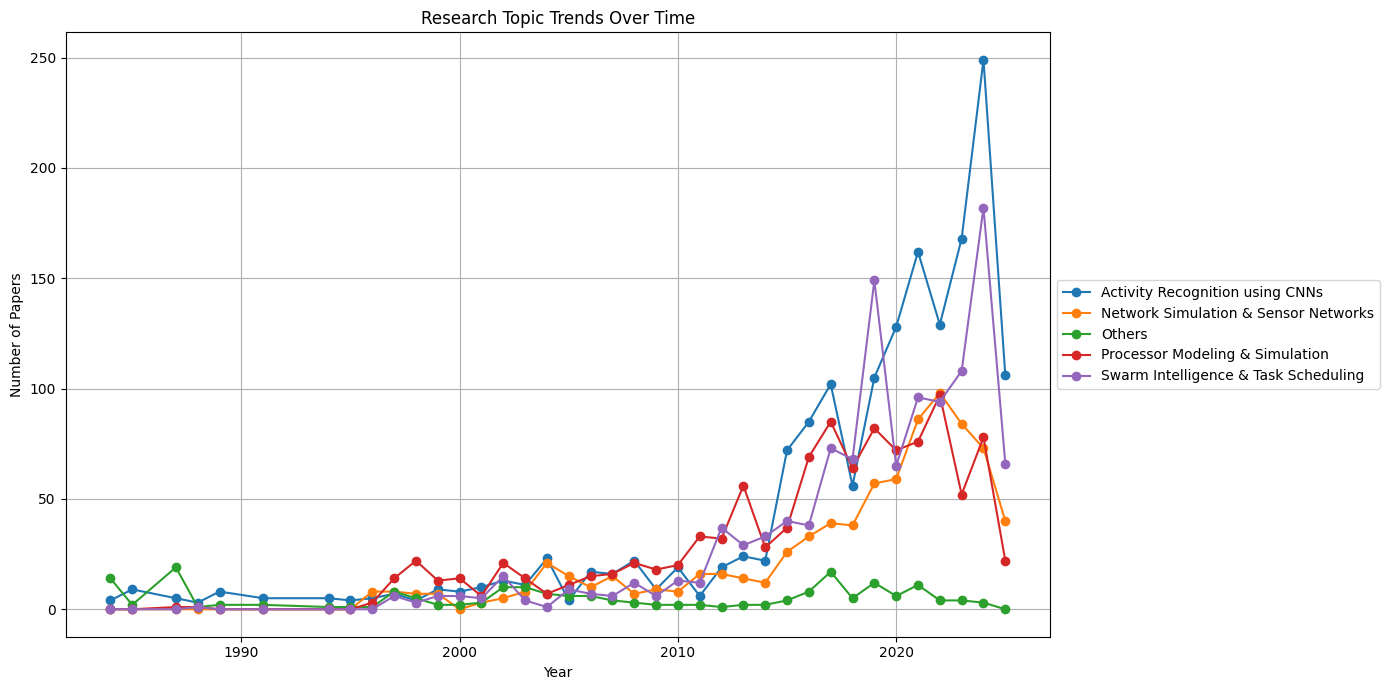

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of papers per topic per year
topic_trend = df.groupby(['year', 'topic_label']).size().unstack().fillna(0)

# Plot
topic_trend.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('Research Topic Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()


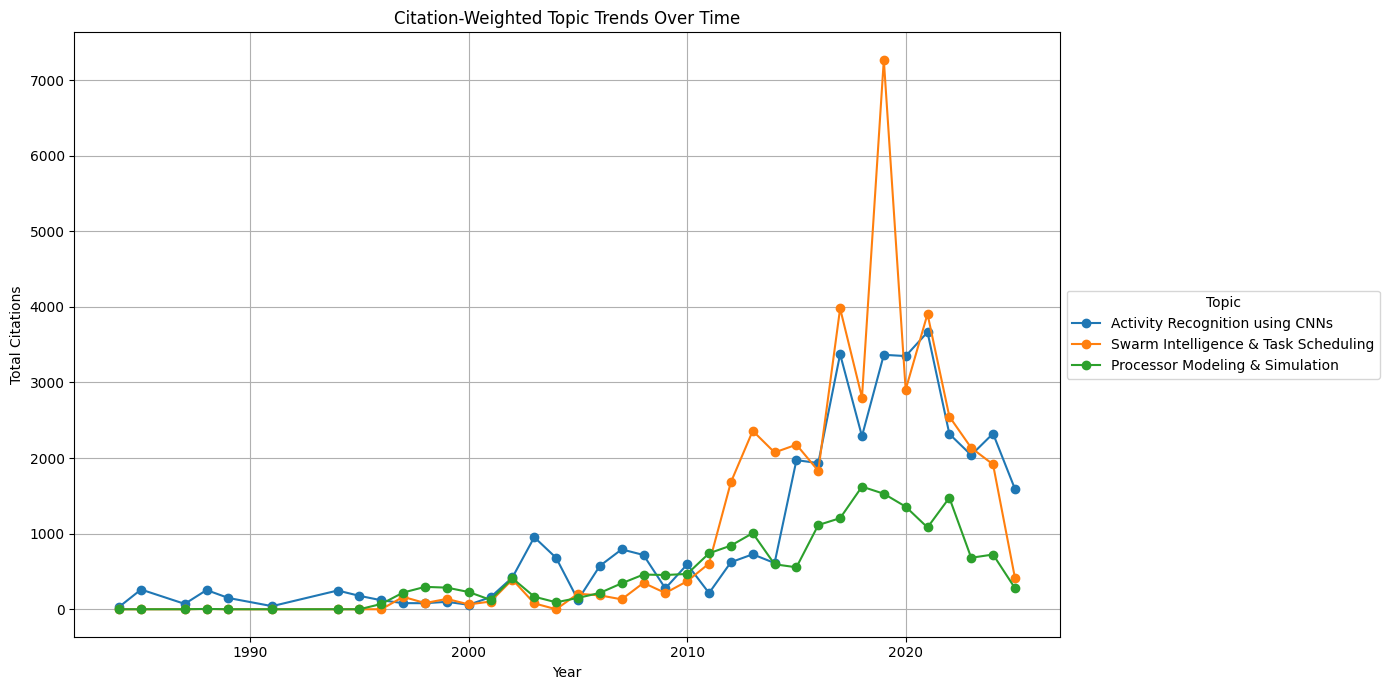

In [30]:
# Weighted citation trend (summing citation counts)
citation_weighted = df.groupby(['year', 'topic_label'])['citation_count'].sum().unstack().fillna(0)

# Plot
top_topics = df['topic_label'].value_counts().nlargest(3).index
citation_weighted[top_topics].plot(figsize=(14, 7), marker='o')
plt.title('Citation-Weighted Topic Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Citations')
plt.grid(True)
plt.legend(title="Topic", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()


# **Future research trend pridiction using LSTM**

X shape: (33, 5, 5)
y shape: (33, 5)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 18245 (71.27 KB)
Trainable params: 18245 (71.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 0.1048
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0974
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0909
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0848
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - lo

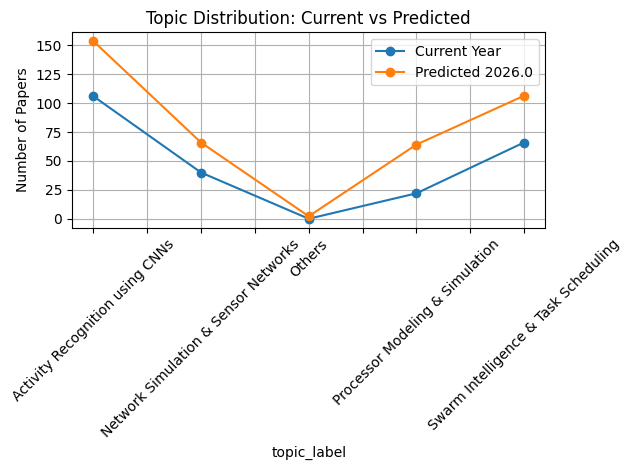

In [21]:

topic_series = df.groupby(['year', 'topic_label']).size().unstack().fillna(0)


# Normalize to avoid dominance of high-volume topics
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
topic_series_scaled = pd.DataFrame(scaler.fit_transform(topic_series),
                                   index=topic_series.index,
                                   columns=topic_series.columns)

# Prepare sequence data for LSTM
import numpy as np

sequence_length = 5
X, y = [], []

all_years = topic_series_scaled.index.tolist()


# Data creating, x contains data of 5 years and y for 6th so look at that of 5 and predict 6th. and soo till total number of years

for i in range(len(all_years) - sequence_length):
    X.append(topic_series_scaled.iloc[i:i + sequence_length].values)
    y.append(topic_series_scaled.iloc[i + sequence_length].values)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # (total number of data point, years in one data point (time steps), features in one year)
print("y shape:", y.shape)  # (total number of data point, one year data point)

# Build & Train LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(X.shape[2]))
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train model
history = model.fit(X, y, epochs=100, verbose=1)

# Predict next year (e.g., 2026)
last_seq = topic_series_scaled.iloc[-sequence_length:].values.reshape(1, sequence_length, -1)
pred_scaled = model.predict(last_seq)[0]


pred_actual = scaler.inverse_transform([pred_scaled])[0]


next_year = topic_series_scaled.index[-1] + 1
predicted_trend = pd.Series(pred_actual, index=topic_series.columns, name=next_year)
print(f"\n📈 Predicted Topic Distribution for {next_year}")
print(predicted_trend.sort_values(ascending=False))

#Plot current vs predicted
import matplotlib.pyplot as plt

topic_series.loc[topic_series.index[-1]].plot(label='Current Year', marker='o')
predicted_trend.plot(label=f'Predicted {next_year}', marker='o')
plt.title('Topic Distribution: Current vs Predicted')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
